In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7643 entries, 0 to 7642
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7643 non-null   object 
 1   rating    7575 non-null   object 
 2   genre     7643 non-null   object 
 3   year      7643 non-null   int64  
 4   score     7643 non-null   float64
 5   votes     7643 non-null   Int64  
 6   director  7643 non-null   object 
 7   writer    7641 non-null   object 
 8   star      7642 non-null   object 
 9   country   7641 non-null   object 
 10  budget    5482 non-null   float64
 11  gross     7464 non-null   float64
 12  company   7630 non-null   object 
 13  runtime   7640 non-null   float64
 14  decade    7643 non-null   object 
dtypes: Int64(1), float64(4), int64(1), object(9)
memory usage: 903.3+ KB


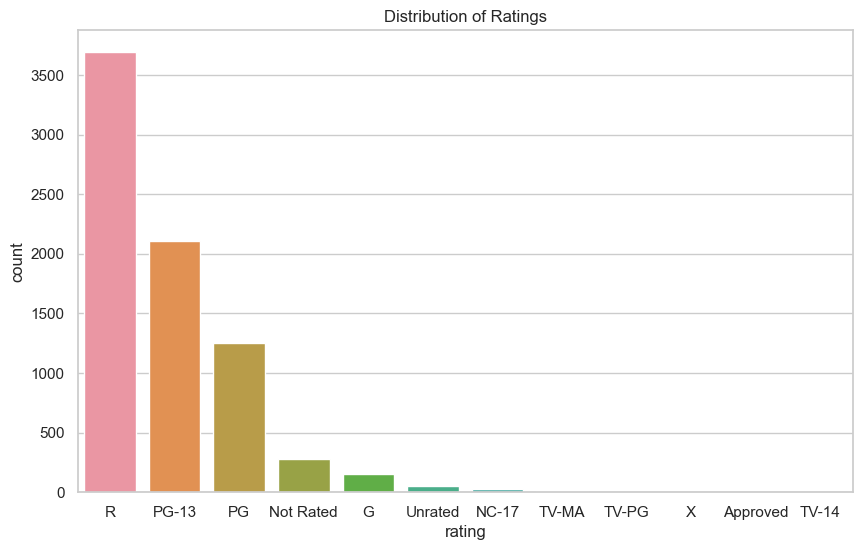

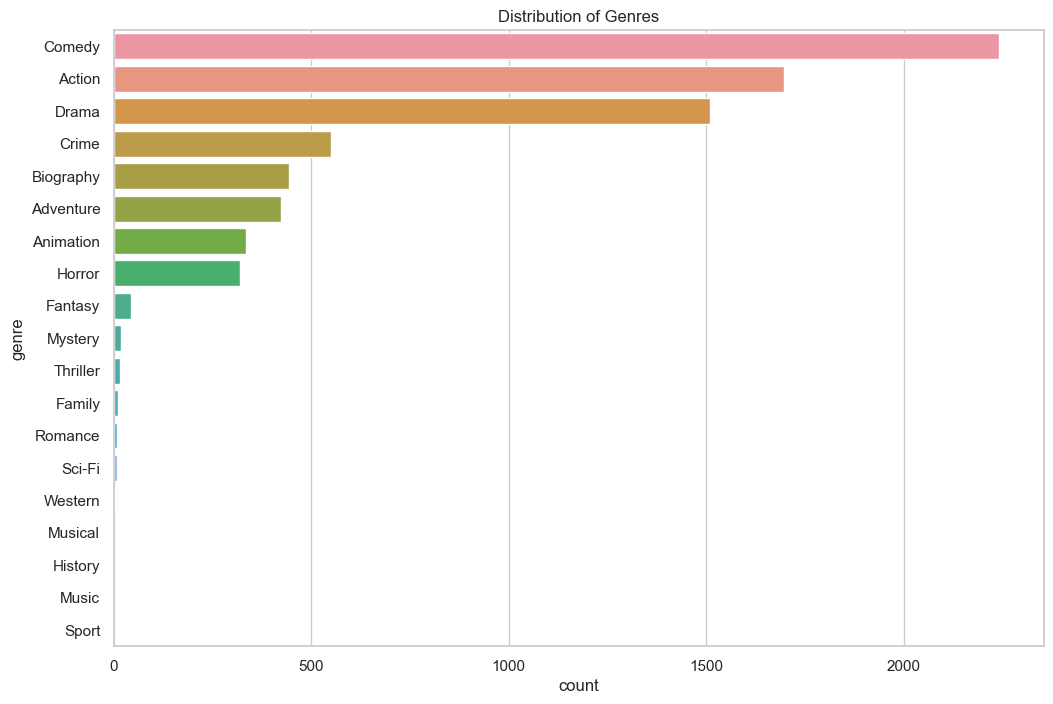

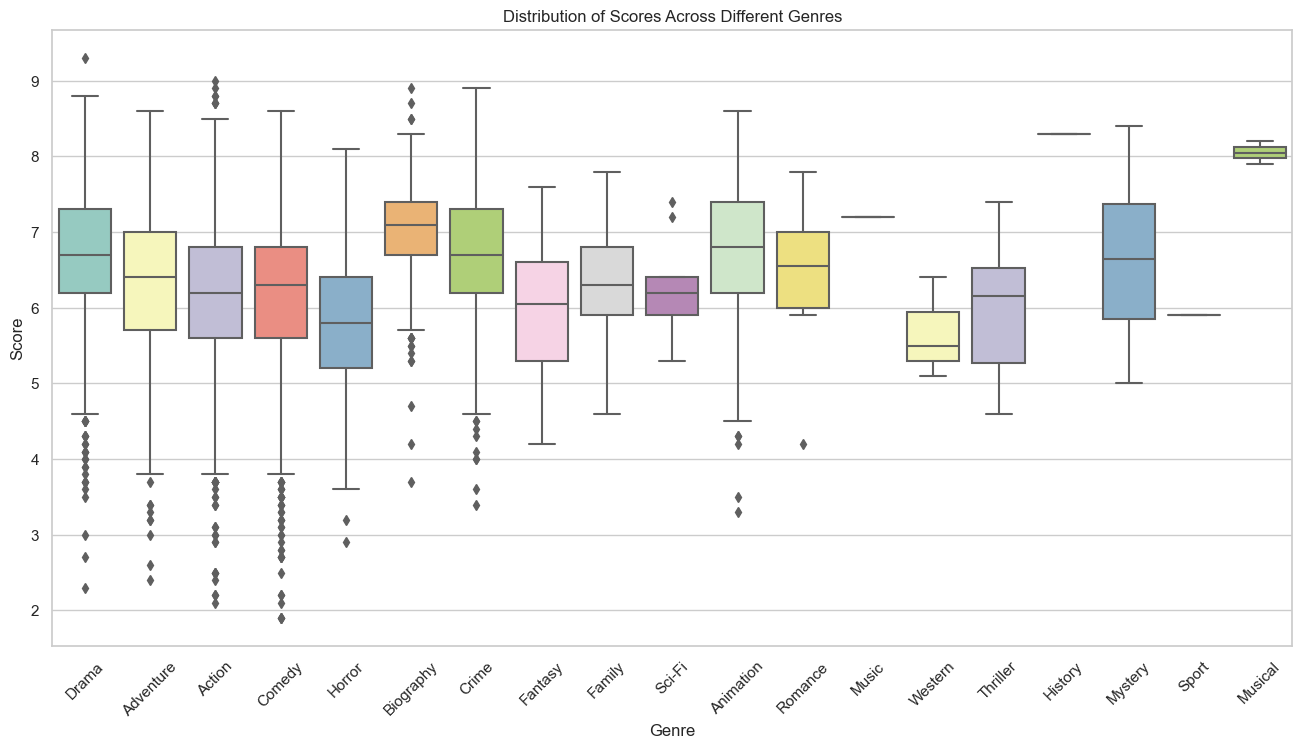

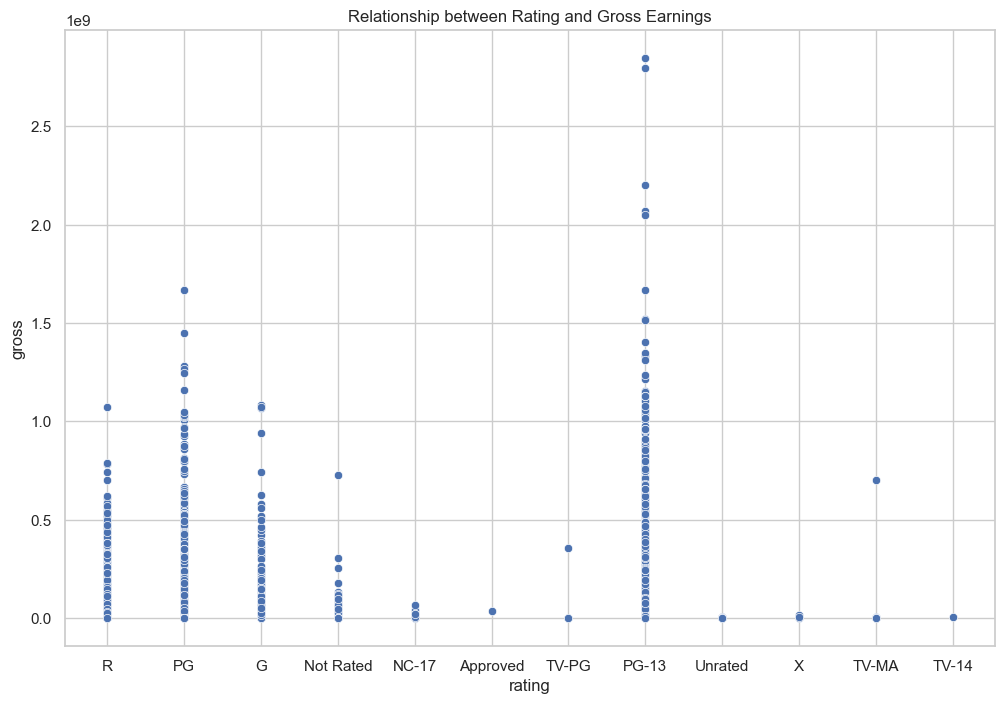

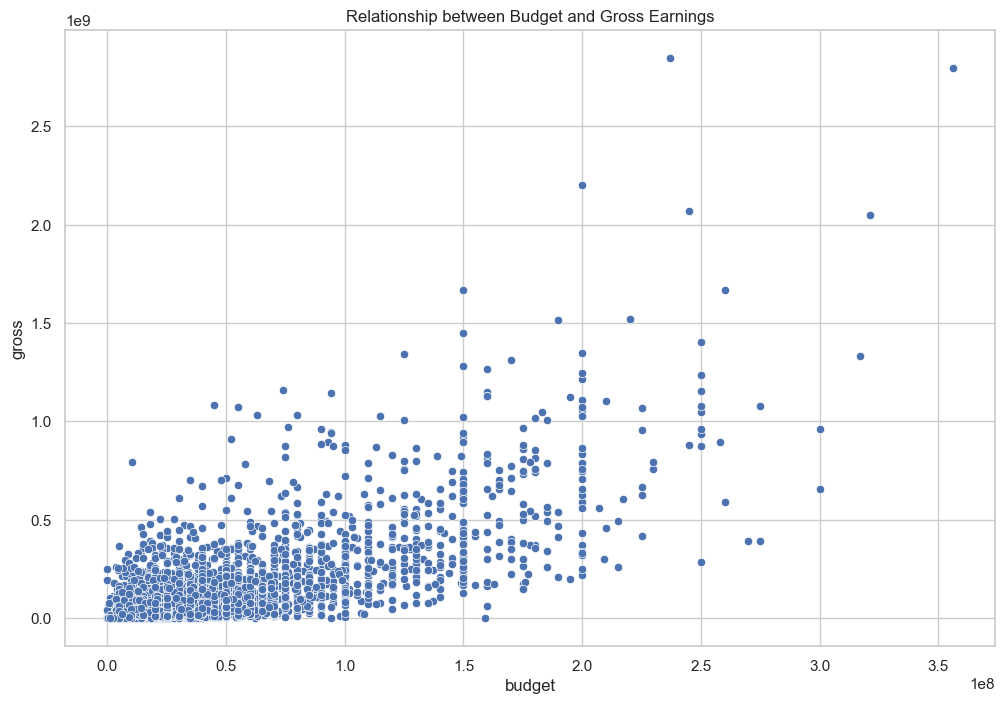

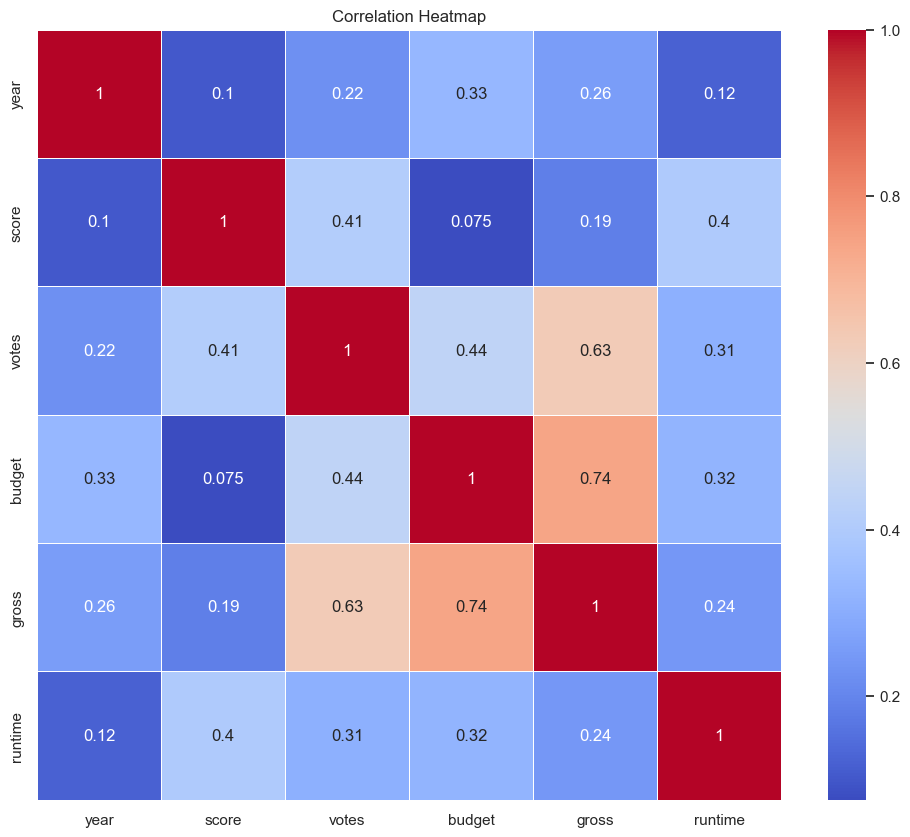

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Overview of the dataset
movie_data.info()

# Summary statistics
movie_data.describe()

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=movie_data, order=movie_data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

# Distribution of Genres
plt.figure(figsize=(12, 8))
sns.countplot(y='genre', data=movie_data, order=movie_data['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.show()

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Box Plot of Scores by Genre
plt.figure(figsize=(16, 8))
sns.boxplot(x='genre', y='score', data=movie_data, palette='Set3')
plt.title('Distribution of Scores Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Relationship between Rating and Gross Earnings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rating', y='gross', data=movie_data)
plt.title('Relationship between Rating and Gross Earnings')
plt.show()

# Relationship between Budget and Gross Earnings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='gross', data=movie_data)
plt.title('Relationship between Budget and Gross Earnings')
plt.show()

# Select only numeric columns for correlation heatmap
numeric_columns = movie_data.select_dtypes(include=['float64', 'int64']).columns

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(movie_data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


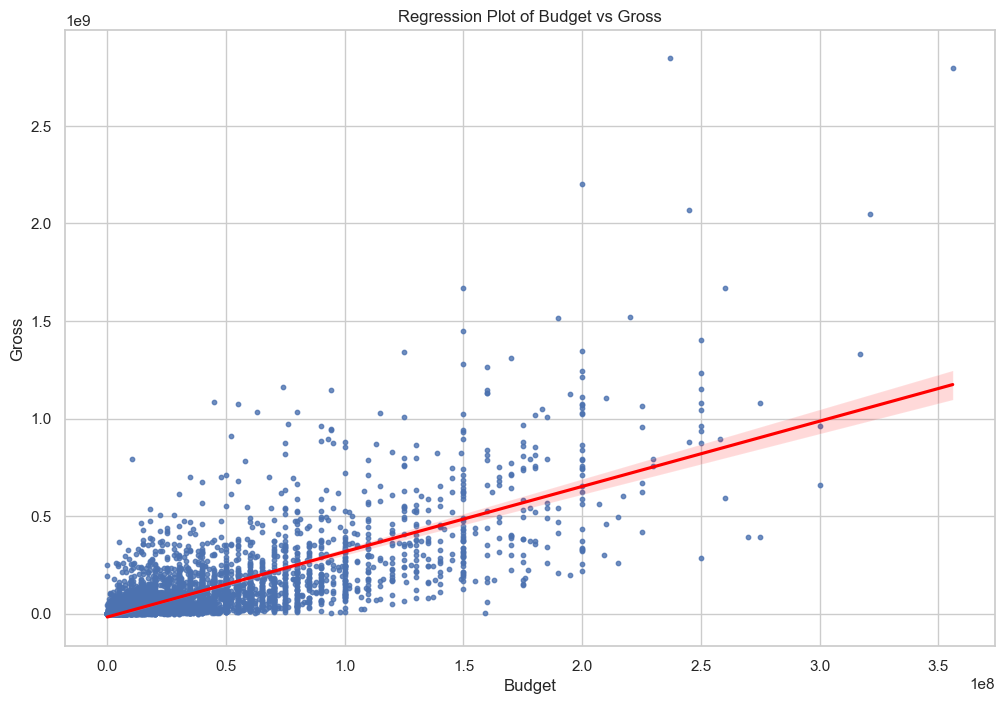

In [77]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Regression Plot of Budget vs Gross
plt.figure(figsize=(12, 8))
sns.regplot(x='budget', y='gross', data=movie_data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Regression Plot of Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [81]:
import statsmodels.api as sm
import numpy as np

# Assuming 'budget' is the independent variable
X = movie_data[['budget']]
y = movie_data['gross']

# Check for and handle missing values
missing_values = X[X.isna().any(axis=1)]
if not missing_values.empty:
    print("Removing rows with missing values.")
    movie_data = movie_data.dropna(subset=['budget', 'gross'])
    X = movie_data[['budget']]
    y = movie_data['gross']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit a Poisson GLM
glm_model = sm.GLM(y, X, family=sm.families.Poisson())
glm_results = glm_model.fit()

# Display GLM summary
print(glm_results.summary())


Removing rows with missing values.
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  gross   No. Observations:                 5428
Model:                            GLM   Df Residuals:                     5426
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3781e+11
Date:                Thu, 30 Nov 2023   Deviance:                   4.7563e+11
Time:                        01:17:39   Pearson chi2:                 6.20e+11
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.

In [82]:
#p-value fot budget is extremely small, suggesting that the variable is statistically significant.
#R-squared is 1.0000 suggesting that the model explains the variance in the dependent variable.